In [1]:
from numpy import *
import matplotlib.pyplot as plt
import scipy.stats
import scipy.signal as signal
import numpy as np
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
def plot(x,y1,y2,y3,y4,y5,y6,y7):
    x_set = np.arange(0, len(x), 1)
    x_set2 = np.arange(0, len(y6), 1)
    plt.figure(figsize=(16,4))
    plt.tight_layout()
    plt.subplot(421)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    labels1 = []
    plt.ylabel("Flow")
    plt.plot(x_set, x, 'b', linewidth=1)
    plt.xticks(color='w')
    labels1.append(r'P04(f) ')
    plt.legend(labels1, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    plt.subplot(422)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    labels2 = []
    plt.ylabel("Flow")
    plt.plot(x_set, y1, 'g', linewidth=1)
    plt.xticks(color='w')
    labels2.append(r'P08(f) ')
    plt.legend(labels2, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    plt.subplot(423)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    labels3 = []
    plt.ylabel("Occupancy")
    plt.plot(x_set, y2, 'b', linewidth=1)
    plt.xticks(color='w')
    labels3.append(r'P04(o) ')
    plt.legend(labels3, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    plt.subplot(424)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    labels4 = []
    plt.ylabel("Occupancy")
    plt.plot(x_set, y3, 'g', linewidth=1)
    plt.xticks(color='w')
    labels4.append(r'P08(o) ')
    plt.legend(labels4, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    plt.subplot(425)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
    labels5 = []
    plt.ylabel("Speed")
    plt.plot(x_set, y4, 'b', linewidth=1)

    labels5.append(r'P04(s) ')
    plt.legend(labels5, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    
    plt.subplot(426)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
    labels6 = []
    plt.ylabel("Speed")
    plt.xlabel("Timestamp")
    plt.plot(x_set, y5, 'g', linewidth=1)

    labels6.append(r'P08(s) ')
    plt.legend(labels6, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    '''
    plt.subplot(427)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
    labels7 = []
    plt.ylabel("Speed")
    plt.xlabel("Timestamp")
    #plt.plot(x_set2, y6, 'b', linewidth=1)
    labels7.append(r'SZ_S ')
    plt.legend(labels7, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    plt.subplot(428)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
    labels8 = []
    plt.ylabel("Speed")
    plt.xlabel("Timestamp")
    #plt.plot(x_set2, y7, 'g', linewidth=1)
    labels8.append(r'CD_S ')
    plt.legend(labels8, ncol=4, loc='upper right',
               bbox_to_anchor=[1, 1],
               columnspacing=1.0, labelspacing=0.2,
               handletextpad=0.2, handlelength=1.5,
               fancybox=True, shadow=True)
    '''
    plt.savefig('simd2.png',dpi=600)
    plt.show()

In [3]:
def loadData(filename,sample_frequency):
    data = filename#np.load(filename)#nodes,timestamp
    days=min(7,math.floor(data.shape[1]/sample_frequency))
    Y = np.array(data[ :, 0:days*sample_frequency])
    Y_re=Y.reshape([-1,days,sample_frequency])#nodes,days,samples
    Y_sum=Y_re.sum(axis=1)
    Y_nz=np.count_nonzero(Y_re, axis=1)
    Y_nz[Y_nz == 0] = 1
    Y_mean=Y_sum/Y_nz
    return Y_mean #node, fre

In [4]:
def fre_uni(datax,datay):
    frex=datax.shape[1]
    n_tar = signal.resample(datay.T, frex)
    return datax,n_tar.T

In [5]:
def timestamp_alignment(datax,datay1,datay2,datay3,datay4,datay5,datay6,datay7):
    #print(datax.shape,'dataxshape') node,samples
    x_nz = np.count_nonzero(datax, axis=0)
    x_nz[x_nz == 0] = 1
    x_sum = datax.sum(axis=0)
    mean_sequence_x=x_sum/x_nz
    y1_nz = np.count_nonzero(datay1, axis=0)
    y1_nz[y1_nz == 0] = 1
    y1_sum = datay1.sum(axis=0)
    mean_sequence_y1 = y1_sum / y1_nz
    y2_nz = np.count_nonzero(datay2, axis=0)
    y2_nz[y2_nz == 0] = 1
    y2_sum = datay2.sum(axis=0)
    mean_sequence_y2 = y2_sum / y2_nz
    y3_nz = np.count_nonzero(datay3, axis=0)
    y3_nz[y3_nz == 0] = 1
    y3_sum = datay3.sum(axis=0)
    mean_sequence_y3 = y3_sum / y3_nz
    y4_nz = np.count_nonzero(datay4, axis=0)
    y4_nz[y4_nz == 0] = 1
    y4_sum = datay4.sum(axis=0)
    mean_sequence_y4 = y4_sum / y4_nz
    y5_nz = np.count_nonzero(datay5, axis=0)
    y5_nz[y5_nz == 0] = 1
    y5_sum = datay5.sum(axis=0)
    mean_sequence_y5 = y5_sum / y5_nz
    y6_nz = np.count_nonzero(datay6, axis=0)
    y6_nz[y6_nz == 0] = 1
    y6_sum = datay6.sum(axis=0)
    mean_sequence_y6 = y6_sum / y6_nz
    y7_nz = np.count_nonzero(datay7, axis=0)
    y7_nz[y7_nz == 0] = 1
    y7_sum = datay7.sum(axis=0)
    mean_sequence_y7 = y7_sum / y7_nz
    
    
    plot(mean_sequence_x,mean_sequence_y1,mean_sequence_y2,mean_sequence_y3,mean_sequence_y4,mean_sequence_y5,mean_sequence_y6,mean_sequence_y7)
    mark_x=np.argmin(mean_sequence_x)-1*288
    mark_y1 = np.argmin(mean_sequence_y1)+1*288
    mark_y2 = np.argmin(mean_sequence_y2)+1*288
    mark_y3 = np.argmin(mean_sequence_y3)+1*288
    mark_y4 = np.argmin(mean_sequence_y4)+2*288
    mark_y5 = np.argmin(mean_sequence_y5)
    mark_y6 = np.argmin(mean_sequence_y6)
    mark_y7 = np.argmin(mean_sequence_y7)
    x_a,x_b=datax.T[0:mark_x],datax.T[mark_x:]
    y1_a, y1_b = datay1.T[0:mark_y1], datay1.T[mark_y1:]
    y2_a, y2_b = datay2.T[0:mark_y2], datay2.T[mark_y2:]
    y3_a, y3_b = datay3.T[0:mark_y3], datay3.T[mark_y3:]
    y4_a, y4_b = datay4.T[0:mark_y4], datay4.T[mark_y4:]
    y5_a, y5_b = datay5.T[0:mark_y5], datay5.T[mark_y5:]
    y6_a, y6_b = datay6.T[0:mark_y6], datay6.T[mark_y6:]
    y7_a, y7_b = datay7.T[0:mark_y7], datay7.T[mark_y7:]
    n_datax=np.append(x_b,x_a,axis=0).T
    n_datay1 = np.append(y1_b, y1_a,axis=0).T
    n_datay2 = np.append(y2_b, y2_a,axis=0).T
    n_datay3 = np.append(y3_b, y3_a,axis=0).T
    n_datay4 = np.append(y4_b, y4_a,axis=0).T
    n_datay5 = np.append(y5_b, y5_a,axis=0).T
    n_datay6 = np.append(y6_b, y6_a,axis=0).T
    n_datay7 = np.append(y7_b, y7_a,axis=0).T
    return n_datax,n_datay1,n_datay2,n_datay3,n_datay4,n_datay5,n_datay6,n_datay7

In [6]:
def Simcaculate(x,y):
    Sim = []
    for i in range(len(x)):
        if 0 in x[i]:continue
        s = []
        for j in range(len(y)):
            if 0 in y[j]:
                KL = 0
                continue
            else:
                KL = np.exp(-scipy.stats.entropy(x[i], y[j]))
            s.append(KL)
        Sim.append(np.max(s))
    Sim = np.mean(Sim)
    return Sim

In [7]:
data_pems04_f=np.load('PEMS04_f.npy')[:,60:]#nodes, samples
data_pems08_f=np.load('PEMS08_f.npy')
data_pems04_o=np.load('PEMS04_o.npy')[:,160:]
data_pems08_o=np.load('PEMS08_o.npy')
data_pems04_s=np.load('PEMS04_s.npy')[:,560:]
data_pems08_s=np.load('PEMS08_s.npy')
data_CD=np.load('CD_S.npy')[:,100:]
data_SZ=np.load('SZ_S.npy')
print('shape of data_pems04_f:', data_pems04_f.shape)
print('shape of data_pems08_f:', data_pems08_f.shape)
print('shape of data_pems04_o:', data_pems04_o.shape)
print('shape of data_pems08_o:', data_pems08_o.shape)
print('shape of data_pems04_s:', data_pems04_s.shape)
print('shape of data_pems08_s:', data_pems08_s.shape)
print('shape of data_CD:', data_CD.shape)
print('shape of data_SZ:', data_SZ.shape)

shape of data_pems04_f: (307, 16932)
shape of data_pems08_f: (170, 17856)
shape of data_pems04_o: (307, 16832)
shape of data_pems08_o: (170, 17856)
shape of data_pems04_s: (307, 16432)
shape of data_pems08_s: (170, 17856)
shape of data_CD: (826, 45404)
shape of data_SZ: (1174, 52293)


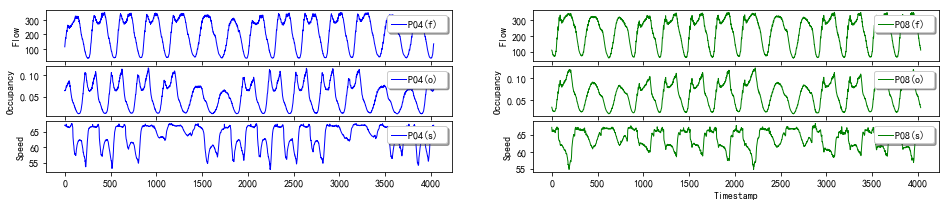

In [8]:

y1=loadData(data_pems04_f,288*14)
y11=loadData(data_pems08_f,288*14)
y2=loadData(data_pems04_o,288*14)
y22=loadData(data_pems08_o,288*14)
y3=loadData(data_pems04_s,288*14)
y33=loadData(data_pems08_s,288*14)

x_aligned,y1_aligned,y2_aligned,y3_aligned,y4_aligned,y5_aligned,y6_aligned,y7_aligned=timestamp_alignment(y1,y11,y2,y22,y3,y33,y1,y1)

#x_aligned,y_aligned=timestamp_alignment(x_aligned,y_aligned)#show the effect of alignment.
#Sim=Simcaculate(x_aligned,y_aligned)
#print('The similarity between CD_S and SZ_S :',Sim)

ADF Statistic: -4.537117192213826
n_lags: 0.0001684039370660496
p-value: 0.0001684039370660496
Mean Std: 228.55440196078433 93.56631819809894


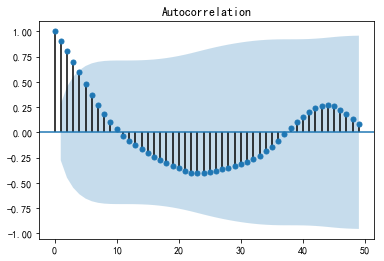

In [9]:
series=y11[:,0:800]
result = adfuller(np.mean(series,axis=0), autolag='AIC')
print('ADF Statistic:', result[0])
print('n_lags:', result[1])
print('p-value:', result[1])
print('Mean Std:',np.mean(np.mean(series,axis=0)),np.std(np.mean(series,axis=0)))

plot_acf(np.mean(series[:,0:50],axis=0))
plt.savefig('flowACF.png',dpi=600)
plt.show()

ADF Statistic: -2.7524934372494743
n_lags: 0.0653866875860845
p-value: 0.0653866875860845
Mean Std: 64.16986819852941 2.8009875054500717


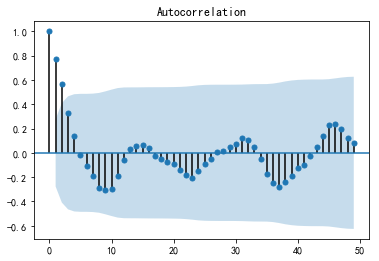

In [10]:
series=y33[:,0:800]
result = adfuller(np.mean(series,axis=0), autolag='AIC')
print('ADF Statistic:', result[0])
print('n_lags:', result[1])
print('p-value:', result[1])
print('Mean Std:',np.mean(np.mean(series,axis=0)),np.std(np.mean(series,axis=0)))

plot_acf(np.mean(series[:,0:50],axis=0))
plt.savefig('speedACF.png',dpi=600)
plt.show()